In [6]:
import pandas as pd
import numpy as np
import scipy as spy
import math
import sklearn as skl
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt

In [7]:
pip install factor_analyzer

  Using cached factor_analyzer-0.4.1.tar.gz (41 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached pre_commit-2.20.0-py2.py3-none-any.whl (199 kB)
     |████████████████████████████████| 98 kB 651 kB/s eta 0:00:01
     |████████████████████████████████| 8.8 MB 60 kB/s eta 0:00:011
     |████████████████████████████████| 468 kB 116 kB/s eta 0:00:01
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42015 sha256=f0dda145e02d80845a45c1c193ed4a442f88c0b5b6c8ba3ed92d9b0f2017eb4c
  Stored in directory: /Users/vijithanayak/Library/Caches/pip/wheels/6d/32/bd/460a71becd83f7d77152f437c2fd451f5c87bc19cfcdbfcd24
Successfully built factor-analyzer
Note: you may need to restart the kernel to use updated packages.


In [13]:
from factor_analyzer import FactorAnalyzer

In [14]:
#data import
df=pd.read_csv("/Users/vijithanayak/HRA/wfb.csv")

In [57]:
df.head(6)

,JS1,JS2,JS3,FS1,FS2,FS3,LS1,LS2,LS3,LS4,LS5,WFB1,WFB2,WFB3,WFB4,WFB5
0,3.0,6.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,2.0,2,2.0,2,2,1.0
1,7.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,3,3.0,6,2,2.0
2,6.0,6.0,7.0,5.0,5.0,5.0,5.0,6.0,6.0,7.0,4.0,5,5.0,4,6,6.0
3,7.0,7.0,7.0,6.0,6.0,6.0,7.0,6.0,6.0,6.0,5.0,6,6.0,6,6,7.0
4,7.0,7.0,7.0,4.0,4.0,5.0,6.0,6.0,6.0,7.0,1.0,4,6.0,6,5,6.0
5,5.0,6.0,5.0,7.0,7.0,7.0,5.0,6.0,5.0,6.0,3.0,6,6.0,6,6,6.0


In [16]:
df.columns

Index(['Gender', 'Age', 'YourMaritalStatus', 'EducationLevel', 'JS1', 'JS2',
       'JS3', 'FS1', 'FS2', 'FS3', 'LS1', 'LS2', 'LS3', 'LS4', 'LS5', 'WFB1',
       'WFB2', 'WFB3', 'WFB4', 'WFB5', 'WFB', 'JS', 'FS', 'LS'],
      dtype='object')

In [17]:
#droping the variables
df.drop(['Gender', 'Age', 'YourMaritalStatus', 'EducationLevel'], axis=1, inplace=True)

In [18]:
df.drop(['WFB', 'JS', 'FS', 'LS'], axis=1, inplace=True)

In [19]:
df.columns

Index(['JS1', 'JS2', 'JS3', 'FS1', 'FS2', 'FS3', 'LS1', 'LS2', 'LS3', 'LS4',
       'LS5', 'WFB1', 'WFB2', 'WFB3', 'WFB4', 'WFB5'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JS1     294 non-null    float64
 1   JS2     294 non-null    float64
 2   JS3     294 non-null    float64
 3   FS1     294 non-null    float64
 4   FS2     294 non-null    float64
 5   FS3     294 non-null    float64
 6   LS1     294 non-null    float64
 7   LS2     294 non-null    float64
 8   LS3     294 non-null    float64
 9   LS4     294 non-null    float64
 10  LS5     294 non-null    float64
 11  WFB1    294 non-null    int64  
 12  WFB2    294 non-null    float64
 13  WFB3    294 non-null    int64  
 14  WFB4    294 non-null    int64  
 15  WFB5    294 non-null    float64
dtypes: float64(13), int64(3)
memory usage: 36.9 KB


In [21]:
df.head(3)

,JS1,JS2,JS3,FS1,FS2,FS3,LS1,LS2,LS3,LS4,LS5,WFB1,WFB2,WFB3,WFB4,WFB5
0,3.0,6.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,2.0,2,2.0,2,2,1.0
1,7.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,3,3.0,6,2,2.0
2,6.0,6.0,7.0,5.0,5.0,5.0,5.0,6.0,6.0,7.0,4.0,5,5.0,4,6,6.0


In [22]:
#droping the missing value rows
df.dropna(inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JS1     294 non-null    float64
 1   JS2     294 non-null    float64
 2   JS3     294 non-null    float64
 3   FS1     294 non-null    float64
 4   FS2     294 non-null    float64
 5   FS3     294 non-null    float64
 6   LS1     294 non-null    float64
 7   LS2     294 non-null    float64
 8   LS3     294 non-null    float64
 9   LS4     294 non-null    float64
 10  LS5     294 non-null    float64
 11  WFB1    294 non-null    int64  
 12  WFB2    294 non-null    float64
 13  WFB3    294 non-null    int64  
 14  WFB4    294 non-null    int64  
 15  WFB5    294 non-null    float64
dtypes: float64(13), int64(3)
memory usage: 36.9 KB


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [25]:
corr = df.corr(method='pearson')
corr

,JS1,JS2,JS3,FS1,FS2,FS3,LS1,LS2,LS3,LS4,LS5,WFB1,WFB2,WFB3,WFB4,WFB5
JS1,1.000000,0.746546,0.668964,0.343769,0.358915,0.347791,0.503294,0.428405,0.499894,0.425349,0.354261,0.391709,0.380172,0.319856,0.342301,0.317372
JS2,0.746546,1.000000,0.689562,0.314412,0.313857,0.304276,0.452484,0.345401,0.404317,0.323678,0.304284,0.309404,0.283341,0.231897,0.262977,0.208268
JS3,0.668964,0.689562,1.000000,0.221715,0.233309,0.229270,0.391315,0.318411,0.374323,0.322730,0.219139,0.243358,0.223612,0.214948,0.232935,0.235523
FS1,0.343769,0.314412,0.221715,1.000000,0.908294,0.880124,0.706766,0.646596,0.643549,0.494513,0.468409,0.487194,0.473857,0.459339,0.463843,0.428904
FS2,0.358915,0.313857,0.233309,0.908294,1.000000,0.914603,0.734151,0.710577,0.663519,0.540078,0.502652,0.508783,0.494406,0.453194,0.485398,0.423250
FS3,0.347791,0.304276,0.229270,0.880124,0.914603,1.000000,0.734676,0.711994,0.701085,0.583213,0.486668,0.523864,0.523730,0.506375,0.505063,0.460434
LS1,0.503294,0.452484,0.391315,0.706766,0.734151,0.734676,1.000000,0.814450,0.776172,0.654154,0.588366,0.519982,0.502557,0.470696,0.482511,0.439234
LS2,0.428405,0.345401,0.318411,0.646596,0.710577,0.711994,0.814450,1.000000,0.782540,0.648305,0.553692,0.496039,0.433212,0.410361,0.453241,0.426464
LS3,0.499894,0.404317,0.374323,0.643549,0.663519,0.701085,0.776172,0.782540,1.000000,0.747645,0.604025,0.483740,0.442431,0.437060,0.458334,0.411959
LS4,0.425349,0.323678,0.322730,0.494513,0.540078,0.583213,0.654154,0.648305,0.747645,1.000000,0.577644,0.409621,0.390700,0.364454,0.376652,0.358692


In [26]:
fa = FactorAnalyzer(n_factors=4, rotation="promax")

In [27]:
fa.fit(df)

FactorAnalyzer(n_factors=4, rotation_kwargs={})

In [28]:
loadings=fa.loadings_

In [19]:
loadings

array([[ 0.06153107,  0.10201227, -0.0380283 ,  0.79255356],
       [-0.03843872, -0.10295089,  0.08673041,  0.91877085],
       [-0.0132588 ,  0.01555538, -0.0619797 ,  0.80228431],
       [ 0.00414702, -0.03484884,  0.95435909,  0.01658922],
       [-0.01409658,  0.03366943,  0.95394131, -0.00424702],
       [ 0.04369222,  0.13998414,  0.82827785, -0.0459361 ],
       [ 0.01685017,  0.60558634,  0.26061238,  0.10700595],
       [-0.00835897,  0.7230552 ,  0.19518293, -0.0214858 ],
       [-0.023376  ,  0.88632703,  0.03179414,  0.02534942],
       [-0.01310624,  0.91343892, -0.11857264, -0.02083807],
       [ 0.03615453,  0.68314314, -0.01895095, -0.02297695],
       [ 0.87425284,  0.05054129,  0.00453955,  0.02809403],
       [ 0.89217877, -0.01629934,  0.03475559,  0.02345602],
       [ 0.89807146, -0.02546554,  0.02846857, -0.01969882],
       [ 0.97428581, -0.01304599, -0.0120347 , -0.01130948],
       [ 0.89750644,  0.01187618, -0.03716688, -0.01937733]])

In [29]:
ev, v = fa.get_eigenvalues()

In [30]:
xvals=range(1, df.shape[1]+1)

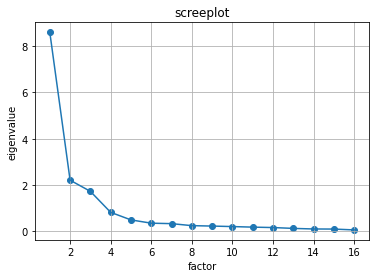

In [31]:
plt.scatter(xvals, ev)
plt.plot(xvals, ev)
plt.title("screeplot")
plt.xlabel('factor')
plt.ylabel('eigenvalue')
plt.grid()
plt.show()

In [32]:
#obtaining the factor laodings
loadings1=pd.DataFrame.from_records(loadings)
loadings1

,0,1,2,3
0,0.061531,0.102012,-0.038028,0.792554
1,-0.038439,-0.102951,0.086730,0.918771
2,-0.013259,0.015555,-0.061980,0.802284
3,0.004147,-0.034849,0.954359,0.016589
4,-0.014097,0.033669,0.953941,-0.004247
5,0.043692,0.139984,0.828278,-0.045936
6,0.016850,0.605586,0.260612,0.107006
7,-0.008359,0.723055,0.195183,-0.021486
8,-0.023376,0.886327,0.031794,0.025349
9,-0.013106,0.913439,-0.118573,-0.020838


In [33]:
#creating data frame
df1=pd.DataFrame.from_records(loadings1)
df1

,0,1,2,3
0,0.061531,0.102012,-0.038028,0.792554
1,-0.038439,-0.102951,0.086730,0.918771
2,-0.013259,0.015555,-0.061980,0.802284
3,0.004147,-0.034849,0.954359,0.016589
4,-0.014097,0.033669,0.953941,-0.004247
5,0.043692,0.139984,0.828278,-0.045936
6,0.016850,0.605586,0.260612,0.107006
7,-0.008359,0.723055,0.195183,-0.021486
8,-0.023376,0.886327,0.031794,0.025349
9,-0.013106,0.913439,-0.118573,-0.020838


In [40]:
#exporting the loadings 
path=("/Users/vijithanayak/HRA/loadings")
df1.to_csv(path)

In [41]:
#bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(4792.341002580756, 0.0)

In [42]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)

In [43]:
kmo_model

0.922967763669724

In [44]:
factorvariance=fa.get_factor_variance()

In [45]:
factorvariance

(array([4.13152744, 3.02314528, 2.64466917, 2.13409207]),
 array([0.25822047, 0.18894658, 0.16529182, 0.13338075]),
 array([0.25822047, 0.44716705, 0.61245887, 0.74583962]))

In [46]:
pd.DataFrame.from_records(factorvariance)

,0,1,2,3
0,4.131527,3.023145,2.644669,2.134092
1,0.258220,0.188947,0.165292,0.133381
2,0.258220,0.447167,0.612459,0.745840


In [47]:
fa.get_communalities()

array([0.64377987, 0.86373847, 0.64791938, 0.9123081 , 0.91135441,
       0.70965889, 0.44638783, 0.56143671, 0.78777551, 0.84903613,
       0.46887878, 0.76768233, 0.79800676, 0.80837935, 0.94967576,
       0.80741571])

In [48]:
factorscore=fa.transform(df)
factorscore

array([[-1.85566935, -1.04858441, -0.49724337, -0.81606876],
       [-1.13642287,  0.30810801,  0.3902172 ,  0.55722703],
       [ 0.3490957 ,  0.24900657, -0.61808444,  0.3214965 ],
       ...,
       [-1.13225433, -0.93461747, -1.36467105, -0.65865212],
       [-0.42964368,  0.52752872,  0.93362097, -0.38841897],
       [-0.4137256 ,  0.39477105,  0.2091611 ,  0.11819241]])

In [49]:
df2=pd.DataFrame.from_records(factorscore)
df2

,0,1,2,3
0,-1.855669,-1.048584,-0.497243,-0.816069
1,-1.136423,0.308108,0.390217,0.557227
2,0.349096,0.249007,-0.618084,0.321496
3,0.826228,0.535804,0.237079,1.052159
4,0.276760,0.253000,-1.077947,1.059869
...,...,...,...,...
289,0.465459,1.050204,0.980480,0.215976
290,0.310096,0.050237,0.934426,0.071359
291,-1.132254,-0.934617,-1.364671,-0.658652
292,-0.429644,0.527529,0.933621,-0.388419


In [53]:
path=("/Users/vijithanayak/HRA/factorscore")
df2.to_csv(path)

In [51]:
df2.head()

,0,1,2,3
0,-1.855669,-1.048584,-0.497243,-0.816069
1,-1.136423,0.308108,0.390217,0.557227
2,0.349096,0.249007,-0.618084,0.321496
3,0.826228,0.535804,0.237079,1.052159
4,0.276760,0.253000,-1.077947,1.059869


In [39]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 2.1 MB/s 
     |████████████████████████████████| 9.8 MB 27.9 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=d07c9d0a67ce83ce64253ab26c22cc5f894048f833ed33b27d45c1f78d4f65cf
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=214416dcfe531bcc7b675881a0de3997c868cd058c1249dc0240848973a72be5
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [40]:
import pingouin as pn

In [41]:
#Defining the factors
JS = df[['JS1', 'JS2', 'JS3']]
FS = df[['FS1', 'FS2', 'FS3']]
LS = df[['LS1', 'LS2', 'LS3', 'LS4','LS5']]
WFB = df[['WFB1', 'WFB2', 'WFB3', 'WFB4', 'WFB5']]

In [42]:
#Get cronbach alpha
JS_alpha = pn.cronbach_alpha(JS)
FS_alpha = pn.cronbach_alpha(FS)
LS_alpha = pn.cronbach_alpha(LS)
WFB_alpha = pn.cronbach_alpha(WFB)

In [43]:
print(JS_alpha,FS_alpha,LS_alpha,WFB_alpha)

(0.8758467432350348, array([0.849, 0.899])) (0.9645440145272896, array([0.957, 0.971])) (0.9031274811956294, array([0.884, 0.92 ])) (0.9575117942133162, array([0.949, 0.965]))
